In [1]:
# the dataset https://www.kaggle.com/datasets/altavish/boston-housing-dataset/data
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df = df.dropna()

## No noise, original data

### Regular Linear Regression

In [5]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [6]:
N_SPLITS = 5
RESULT_METRICS = {}
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=125)

y = df["MEDV"].to_numpy()
X = df.drop("MEDV", axis=1).to_numpy()

In [7]:
avg_mape = 0
avg_mse = 0
avg_r2 = 0
for i, s in enumerate(kf.split(df)):
    X_train = X[s[0]]
    y_train = y[s[0]].reshape(-1, 1)
    X_test = X[s[1]]
    y_test = y[s[1]].reshape(-1, 1)

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train)
    y_test = y_scaler.transform(y_test)

    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(f'Split {i}')
    print(f'\tMAPE={mean_absolute_percentage_error(y_test, y_pred)}')
    print(f'\tMSE={mean_squared_error(y_test, y_pred)}')
    print(f'\tR2={r2_score(y_test, y_pred)}')
    print()
    avg_mape += mean_absolute_percentage_error(y_test, y_pred)
    avg_mse += mean_squared_error(y_test, y_pred)
    avg_r2 += r2_score(y_test, y_pred)
avg_mape /= N_SPLITS
avg_mse /= N_SPLITS
avg_r2 /= N_SPLITS

print(f'Average MAPE={avg_mape}')
print(f'Average MSE={avg_mse}')
print(f'Average R2={avg_r2}')

RESULT_METRICS["Linear Regression"] = {}
RESULT_METRICS["Linear Regression"]["mape"] = avg_mape
RESULT_METRICS["Linear Regression"]["mse"] = avg_mse
RESULT_METRICS["Linear Regression"]["r2"] = avg_r2

Split 0
	MAPE=1.5842985578155309
	MSE=0.2979320029267959
	R2=0.7133669787909804

Split 1
	MAPE=1.088226143623883
	MSE=0.1685705247642984
	R2=0.8094255819573809

Split 2
	MAPE=2.7047651719400703
	MSE=0.2061933625813356
	R2=0.7942683386750646

Split 3
	MAPE=1.5988188615215728
	MSE=0.30491201518631084
	R2=0.7198166382603512

Split 4
	MAPE=2.322285135201992
	MSE=0.3428117536730132
	R2=0.6404315211187317

Average MAPE=1.8596787740206095
Average MSE=0.26408393182635076
Average R2=0.7354618117605017


### Try robust implementations from sklearn

In [8]:
from sklearn.linear_model import HuberRegressor, Lasso

In [9]:
avg_mape = 0
avg_mse = 0
avg_r2 = 0
for i, s in enumerate(kf.split(df)):
    X_train = X[s[0]]
    y_train = y[s[0]].reshape(-1, 1)
    X_test = X[s[1]]
    y_test = y[s[1]].reshape(-1, 1)

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train)
    y_test = y_scaler.transform(y_test)
    
    lr = Lasso(fit_intercept=False, alpha=1e-2)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(f'Split {i}')
    print(f'\tMAPE={mean_absolute_percentage_error(y_test, y_pred)}')
    print(f'\tMSE={mean_squared_error(y_test, y_pred)}')
    print(f'\tR2={r2_score(y_test, y_pred)}')
    print()
    avg_mape += mean_absolute_percentage_error(y_test, y_pred)
    avg_mse += mean_squared_error(y_test, y_pred)
    avg_r2 += r2_score(y_test, y_pred)
avg_mape /= N_SPLITS
avg_mse /= N_SPLITS
avg_r2 /= N_SPLITS

print(f'Average MAPE={avg_mape}')
print(f'Average MSE={avg_mse}')
print(f'Average R2={avg_r2}')

RESULT_METRICS["Lasso"] = {}
RESULT_METRICS["Lasso"]["mape"] = avg_mape
RESULT_METRICS["Lasso"]["mse"] = avg_mse
RESULT_METRICS["Lasso"]["r2"] = avg_r2

Split 0
	MAPE=1.6041934395531652
	MSE=0.29462883800559575
	R2=0.7165448721747532

Split 1
	MAPE=0.9448728647901393
	MSE=0.1759609360929723
	R2=0.8010704834606127

Split 2
	MAPE=2.615013704481518
	MSE=0.20183682907155057
	R2=0.7986151171812461

Split 3
	MAPE=1.701420414180916
	MSE=0.3262453341238935
	R2=0.7002134717096866

Split 4
	MAPE=2.083306417583262
	MSE=0.3443617292142434
	R2=0.6388057823810953

Average MAPE=1.7897613681178002
Average MSE=0.2686067333016511
Average R2=0.7310499453814787


In [10]:
avg_mape = 0
avg_mse = 0
avg_r2 = 0
for i, s in enumerate(kf.split(df)):
    X_train = X[s[0]]
    y_train = y[s[0]].reshape(-1, 1)
    X_test = X[s[1]]
    y_test = y[s[1]].reshape(-1, 1)

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train)
    y_test = y_scaler.transform(y_test)

    lr = HuberRegressor(fit_intercept=False, max_iter=3000)
    lr.fit(X_train, y_train.ravel())
    y_pred = lr.predict(X_test)
    print(f'Split {i}')
    print(f'\tMAPE={mean_absolute_percentage_error(y_test, y_pred)}')
    print(f'\tMSE={mean_squared_error(y_test, y_pred)}')
    print(f'\tR2={r2_score(y_test, y_pred)}')
    print()
    avg_mape += mean_absolute_percentage_error(y_test, y_pred)
    avg_mse += mean_squared_error(y_test, y_pred)
    avg_r2 += r2_score(y_test, y_pred)
avg_mape /= N_SPLITS
avg_mse /= N_SPLITS
avg_r2 /= N_SPLITS

print(f'Average MAPE={avg_mape}')
print(f'Average MSE={avg_mse}')
print(f'Average R2={avg_r2}')

RESULT_METRICS["Huber"] = {}
RESULT_METRICS["Huber"]["mape"] = avg_mape
RESULT_METRICS["Huber"]["mse"] = avg_mse
RESULT_METRICS["Huber"]["r2"] = avg_r2

Split 0
	MAPE=1.5809828127991359
	MSE=0.31202547266910124
	R2=0.6998079996552362

Split 1
	MAPE=0.9135159432450711
	MSE=0.1536573235585569
	R2=0.8262854371717523

Split 2
	MAPE=2.3469280789360676
	MSE=0.18523322395834516
	R2=0.8151815440591991

Split 3
	MAPE=1.7551986884174142
	MSE=0.3204846331420811
	R2=0.7055069743815143

Split 4
	MAPE=2.350051337392128
	MSE=0.36561860802802115
	R2=0.6165098619555547

Average MAPE=1.7893353721579637
Average MSE=0.2674038522712211
Average R2=0.7326583634446513


### Robust Linear Regression

In [11]:
import cvxpy as cp

In [12]:
class RobustLinearRegression:
    def __init__(self, delta):
        self.w = None
        self.delta = delta
        
    def fit(self, X, y):
        lenw = X.shape[1]
        numK = X.shape[0]
        w = cp.Variable(lenw)
        residuals = y - X @ w
        objective = cp.Minimize(cp.sum(cp.square(cp.abs(residuals) + self.delta * cp.norm(w, 2))))
        prob = cp.Problem(objective)
        prob.solve()
        self.w = w.value

    def predict(self, X):
        return X @ self.w

In [13]:
DELTA = 1e-2

avg_mape = 0
avg_mse = 0
avg_r2 = 0

for i, s in enumerate(kf.split(df)):
    X_train = X[s[0]]
    y_train = y[s[0]].reshape(-1, 1)
    X_test = X[s[1]]
    y_test = y[s[1]].reshape(-1, 1)

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train)
    y_test = y_scaler.transform(y_test)

    lr = RobustLinearRegression(delta=DELTA)
    lr.fit(X_train, y_train.ravel())
    y_pred = lr.predict(X_test)
    print(f'Split {i}')
    print(f'\tMAPE={mean_absolute_percentage_error(y_test, y_pred)}')
    print(f'\tMSE={mean_squared_error(y_test, y_pred)}')
    print(f'\tR2={r2_score(y_test, y_pred)}')
    print()
    avg_mape += mean_absolute_percentage_error(y_test, y_pred)
    avg_mse += mean_squared_error(y_test, y_pred)
    avg_r2 += r2_score(y_test, y_pred)
avg_mape /= N_SPLITS
avg_mse /= N_SPLITS
avg_r2 /= N_SPLITS

print(f'Average MAPE={avg_mape}')
print(f'Average MSE={avg_mse}')
print(f'Average R2={avg_r2}')

RESULT_METRICS["Robust LR"] = {}
RESULT_METRICS["Robust LR"]["mape"] = avg_mape
RESULT_METRICS["Robust LR"]["mse"] = avg_mse
RESULT_METRICS["Robust LR"]["r2"] = avg_r2

Split 0
	MAPE=1.5707863957945598
	MSE=0.29719590110795613
	R2=0.7140751641694518

Split 1
	MAPE=1.0575396937919215
	MSE=0.1687323511413038
	R2=0.8092426320160144

Split 2
	MAPE=2.6854697772740583
	MSE=0.20480689227769647
	R2=0.7956517044409381

Split 3
	MAPE=1.6056294652932823
	MSE=0.30593053054915015
	R2=0.718880725458852

Split 4
	MAPE=2.304631583714406
	MSE=0.34227376419645456
	R2=0.640995807656949

Average MAPE=1.8448113831736457
Average MSE=0.26378788785451224
Average R2=0.7357692067484412


### Compare different models

In [14]:
results = pd.DataFrame(RESULT_METRICS)
results

,Linear Regression,Lasso,Huber,Robust LR
mape,1.859679,1.789761,1.789335,1.844811
mse,0.264084,0.268607,0.267404,0.263788
r2,0.735462,0.731050,0.732658,0.735769


### Investigate how the value of `delta` influences the regression metrics on the original data

In [15]:
deltas = [1e-7, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1]
mapes = []
mses = []
r2s = []

for delta in deltas:
    avg_mape = 0
    avg_mse = 0
    avg_r2 = 0
    for i, s in enumerate(kf.split(df)):
        X_train = X[s[0]]
        y_train = y[s[0]].reshape(-1, 1)
        X_test = X[s[1]]
        y_test = y[s[1]].reshape(-1, 1)

        X_scaler = StandardScaler()
        X_train = X_scaler.fit_transform(X_train)
        X_test = X_scaler.transform(X_test)
        y_scaler = StandardScaler()
        y_train = y_scaler.fit_transform(y_train).ravel()
        y_test = y_scaler.transform(y_test).ravel()

        lr = RobustLinearRegression(delta=delta)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        avg_mape += mean_absolute_percentage_error(y_test, y_pred)
        avg_mse += mean_squared_error(y_test, y_pred)
        avg_r2 += r2_score(y_test, y_pred)
    mapes.append(avg_mape / N_SPLITS)
    mses.append(avg_mse / N_SPLITS)
    r2s.append(avg_r2 / N_SPLITS)

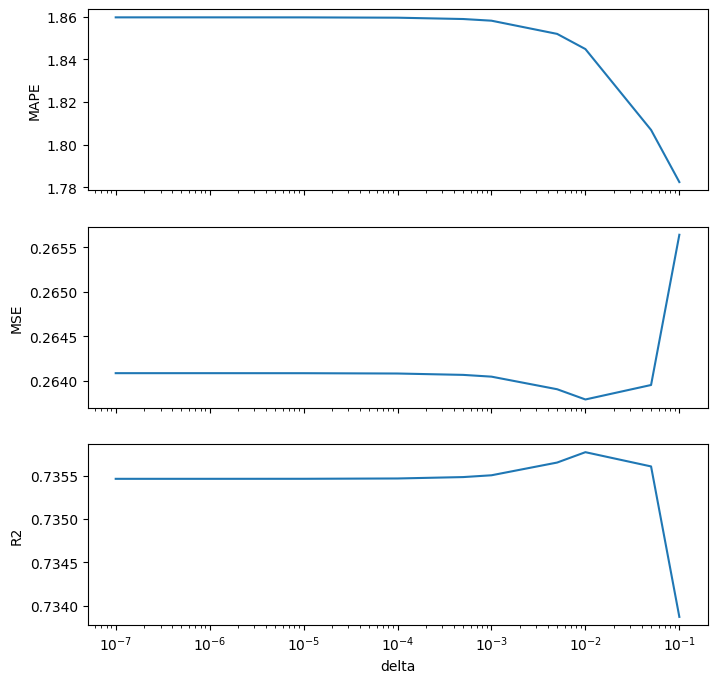

In [16]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(8, 8))
ax[0].plot(deltas, mapes)
ax[1].plot(deltas, mses)
ax[2].plot(deltas, r2s)
ax[0].set_ylabel('MAPE')
ax[1].set_ylabel('MSE')
ax[2].set_ylabel('R2')
plt.xlabel('delta')
plt.xscale('log')
plt.show()

## Add noise to the data

In [17]:
np.random.seed(125)

NOISE_DELTA = 1

In [18]:
np.random.seed(125)

avg_mape = 0
avg_mse = 0
avg_r2 = 0

for i, s in enumerate(kf.split(df)):
    X_train = X[s[0]]
    y_train = y[s[0]]
    X_test = X[s[1]]
    y_test = y[s[1]]

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
    y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    N = np.random.normal(0, 1, X_train.shape)
    row_norms = np.linalg.norm(N, ord=2, axis=1, keepdims=True)
    D = np.diag (np.reciprocal(row_norms).ravel())
    N = np.matmul(D, N)
    X_train = X_train + N * NOISE_DELTA

    N = np.random.normal(0, 1, X_test.shape)
    row_norms = np.linalg.norm(N, ord=2, axis=1, keepdims=True)
    D = np.diag (np.reciprocal(row_norms).ravel())
    N = np.matmul(D, N)
    X_test = X_test + N * NOISE_DELTA
    
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(f'Split {i}')
    print(f'\tMAPE={mean_absolute_percentage_error(y_test, y_pred)}')
    print(f'\tMSE={mean_squared_error(y_test, y_pred)}')
    print(f'\tR2={r2_score(y_test, y_pred)}')
    print()
    avg_mape += mean_absolute_percentage_error(y_test, y_pred)
    avg_mse += mean_squared_error(y_test, y_pred)
    avg_r2 += r2_score(y_test, y_pred)
avg_mape /= N_SPLITS
avg_mse /= N_SPLITS
avg_r2 /= N_SPLITS

print(f'Average MAPE={avg_mape}')
print(f'Average MSE={avg_mse}')
print(f'Average R2={avg_r2}')

RESULT_METRICS["Linear Regression"]["noisy_mape"] = avg_mape
RESULT_METRICS["Linear Regression"]["noisy_mse"] = avg_mse
RESULT_METRICS["Linear Regression"]["noisy_r2"] = avg_r2

Split 0
	MAPE=1.8908286086853068
	MSE=0.32417388345100273
	R2=0.688120313703082

Split 1
	MAPE=1.461159571240263
	MSE=0.2062653642005122
	R2=0.7668103495565155

Split 2
	MAPE=2.5792446307219623
	MSE=0.22419842994236458
	R2=0.776303587656512

Split 3
	MAPE=1.6647076159883323
	MSE=0.3573506309560567
	R2=0.6716308439341958

Split 4
	MAPE=2.862805745666004
	MSE=0.37382016963023984
	R2=0.607907405948245

Average MAPE=2.091749234460374
Average MSE=0.29716169563603523
Average R2=0.70215450015971


In [19]:
np.random.seed(125)
DELTA = 1e-1

avg_mape = 0
avg_mse = 0
avg_r2 = 0

for i, s in enumerate(kf.split(df)):
    X_train = X[s[0]]
    y_train = y[s[0]]
    X_test = X[s[1]]
    y_test = y[s[1]]

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
    y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

    N = np.random.normal(0, 1, X_train.shape)
    # X_train = X_train + N
    row_norms = np.linalg.norm(N, ord=2, axis=1, keepdims=True)
    D = np.diag (np.reciprocal(row_norms).ravel())
    N = np.matmul(D, N)
    X_train = X_train + N * NOISE_DELTA
    N = np.random.normal(0, 1, X_test.shape)
    row_norms = np.linalg.norm(N, ord=2, axis=1, keepdims=True)
    D = np.diag (np.reciprocal(row_norms).ravel())
    N = np.matmul(D, N)
    X_test = X_test + N * NOISE_DELTA

    # N = np.random.normal(0, 1, X_train.shape)
    # row_norms = np.linalg.norm(N, ord=2, axis=1, keepdims=True)
    # D = np.diag (np.reciprocal(row_norms).ravel())
    # N = np.matmul(D, N)
    # X_train_noised = X_train + NOISE_DELTA * N
    lr = RobustLinearRegression(delta=DELTA)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(f'Split {i}')
    print(f'\tMAPE={mean_absolute_percentage_error(y_test, y_pred)}')
    print(f'\tMSE={mean_squared_error(y_test, y_pred)}')
    print(f'\tR2={r2_score(y_test, y_pred)}')
    print()
    avg_mape += mean_absolute_percentage_error(y_test, y_pred)
    avg_mse += mean_squared_error(y_test, y_pred)
    avg_r2 += r2_score(y_test, y_pred)
avg_mape /= N_SPLITS
avg_mse /= N_SPLITS
avg_r2 /= N_SPLITS

print(f'Average MAPE={avg_mape}')
print(f'Average MSE={avg_mse}')
print(f'Average R2={avg_r2}')

RESULT_METRICS["Robust LR"]["noisy_mape"] = avg_mape
RESULT_METRICS["Robust LR"]["noisy_mse"] = avg_mse
RESULT_METRICS["Robust LR"]["noisy_r2"] = avg_r2

Split 0
	MAPE=1.8510434796887159
	MSE=0.31820914829239005
	R2=0.6938588380724997

Split 1
	MAPE=1.4517527066815001
	MSE=0.2080604165348019
	R2=0.764780984965988

Split 2
	MAPE=2.430021874737027
	MSE=0.21700911820339872
	R2=0.7834768013299486

Split 3
	MAPE=1.6781020690138753
	MSE=0.3639570475387602
	R2=0.6655602139983325

Split 4
	MAPE=2.775456912181718
	MSE=0.36260167179012154
	R2=0.6196742667996723

Average MAPE=2.0372754084605673
Average MSE=0.29396748047189447
Average R2=0.7054702210332883


In [20]:
avg_mape = 0
avg_mse = 0
avg_r2 = 0
for i, s in enumerate(kf.split(df)):
    X_train = X[s[0]]
    y_train = y[s[0]]
    X_test = X[s[1]]
    y_test = y[s[1]]

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
    y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

    N = np.random.normal(0, 1, X_train.shape)
    # X_train = X_train + N
    row_norms = np.linalg.norm(N, ord=2, axis=1, keepdims=True)
    D = np.diag (np.reciprocal(row_norms).ravel())
    N = np.matmul(D, N)
    X_train = X_train + N * NOISE_DELTA
    N = np.random.normal(0, 1, X_test.shape)
    row_norms = np.linalg.norm(N, ord=2, axis=1, keepdims=True)
    D = np.diag (np.reciprocal(row_norms).ravel())
    N = np.matmul(D, N)
    X_test = X_test + N * NOISE_DELTA
    
    lr = HuberRegressor(fit_intercept=False, max_iter=3000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(f'Split {i}')
    print(f'\tMAPE={mean_absolute_percentage_error(y_test, y_pred)}')
    print(f'\tMSE={mean_squared_error(y_test, y_pred)}')
    print(f'\tR2={r2_score(y_test, y_pred)}')
    print()
    avg_mape += mean_absolute_percentage_error(y_test, y_pred)
    avg_mse += mean_squared_error(y_test, y_pred)
    avg_r2 += r2_score(y_test, y_pred)
avg_mape /= N_SPLITS
avg_mse /= N_SPLITS
avg_r2 /= N_SPLITS

print(f'Average MAPE={avg_mape}')
print(f'Average MSE={avg_mse}')
print(f'Average R2={avg_r2}')

RESULT_METRICS["Huber"]["noisy_mape"] = avg_mape
RESULT_METRICS["Huber"]["noisy_mse"] = avg_mse
RESULT_METRICS["Huber"]["noisy_r2"] = avg_r2

Split 0
	MAPE=1.7494332066628326
	MSE=0.336570446024348
	R2=0.6761938870416345

Split 1
	MAPE=0.8967645429522444
	MSE=0.1801775391715696
	R2=0.7963034776098331

Split 2
	MAPE=2.5494226770341597
	MSE=0.18836205277887721
	R2=0.8120597212071397

Split 3
	MAPE=1.9588781008622436
	MSE=0.3569163157780614
	R2=0.672029935739584

Split 4
	MAPE=3.685339673996564
	MSE=0.3413735476722935
	R2=0.6419400269924538

Average MAPE=2.167967640301609
Average MSE=0.28067998028502994
Average R2=0.719705409718129


In [21]:
avg_mape = 0
avg_mse = 0
avg_r2 = 0
for i, s in enumerate(kf.split(df)):
    X_train = X[s[0]]
    y_train = y[s[0]]
    X_test = X[s[1]]
    y_test = y[s[1]]

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
    y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

    N = np.random.normal(0, 1, X_train.shape)
    # X_train = X_train + N
    row_norms = np.linalg.norm(N, ord=2, axis=1, keepdims=True)
    D = np.diag (np.reciprocal(row_norms).ravel())
    N = np.matmul(D, N)
    X_train = X_train + N * NOISE_DELTA
    N = np.random.normal(0, 1, X_test.shape)
    row_norms = np.linalg.norm(N, ord=2, axis=1, keepdims=True)
    D = np.diag (np.reciprocal(row_norms).ravel())
    N = np.matmul(D, N)
    X_test = X_test + N * NOISE_DELTA
    
    lr = Lasso(fit_intercept=False, alpha=1e-2)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(f'Split {i}')
    print(f'\tMAPE={mean_absolute_percentage_error(y_test, y_pred)}')
    print(f'\tMSE={mean_squared_error(y_test, y_pred)}')
    print(f'\tR2={r2_score(y_test, y_pred)}')
    print()
    avg_mape += mean_absolute_percentage_error(y_test, y_pred)
    avg_mse += mean_squared_error(y_test, y_pred)
    avg_r2 += r2_score(y_test, y_pred)
avg_mape /= N_SPLITS
avg_mse /= N_SPLITS
avg_r2 /= N_SPLITS

print(f'Average MAPE={avg_mape}')
print(f'Average MSE={avg_mse}')
print(f'Average R2={avg_r2}')

RESULT_METRICS["Lasso"]["noisy_mape"] = avg_mape
RESULT_METRICS["Lasso"]["noisy_mse"] = avg_mse
RESULT_METRICS["Lasso"]["noisy_r2"] = avg_r2

Split 0
	MAPE=1.566195540764311
	MSE=0.3270744707011718
	R2=0.6853297303530934

Split 1
	MAPE=1.140235828117451
	MSE=0.22421456515994279
	R2=0.7465181986484228

Split 2
	MAPE=2.852853452451334
	MSE=0.20180136094575943
	R2=0.7986505058880005

Split 3
	MAPE=2.085090894830682
	MSE=0.3856961323053311
	R2=0.6455841896120214

Split 4
	MAPE=2.048985002278094
	MSE=0.3390853934845872
	R2=0.6443400267354735

Average MAPE=1.9386721436883743
Average MSE=0.29557438451935847
Average R2=0.7040845302474023


In [22]:
results = pd.DataFrame(RESULT_METRICS)
results

,Linear Regression,Lasso,Huber,Robust LR
mape,1.859679,1.789761,1.789335,1.844811
mse,0.264084,0.268607,0.267404,0.263788
r2,0.735462,0.731050,0.732658,0.735769
noisy_mape,2.091749,1.938672,2.167968,2.037275
noisy_mse,0.297162,0.295574,0.280680,0.293967
noisy_r2,0.702155,0.704085,0.719705,0.705470
